In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
class ELM(object):
    def __init__(self,x,num):
        row = x.shape[0]
        columns = x.shape[1]
        rnd = np.random.RandomState(4444)
        self.w = np.random.randn(columns, num)
        self.b = np.random.randn(num) * 0.1
        o = np.dot(x,self.w)+self.b
        h = self.sigmoid(o)
        self.H_ = np.linalg.pinv(h)
        
    def tanh(self, x):
        return np.tanh(x)
    
    def sigmoid(self,x):
        return 1.0 / (1 + np.exp(-x))
 
    def regressor_train(self,T):
#         T = T.reshape(-1,T.shape[1])
        self.beta = np.dot(self.H_,T)
        return self.beta, self.w, self.b
    
    def regressor_test(self,test_x):
        h = self.sigmoid(np.dot(test_x, self.w)+self.b)
        result = np.dot(h, self.beta)
        return result
    
    def classifisor_train(self,T):
        en_one = OneHotEncoder()
        T = en_one.fit_transform(T.reshape(-1,1)).toarray() #独热编码之后一定要用toarray()转换成正常的数组
        # T = np.asarray(T)
        print(self.H_.shape)
        print(T.shape)
        self.beta = np.dot(self.H_,T)
        print(self.beta.shape)
        return self.beta
    
    def classifisor_test(self,test_x):
        b_row = test_x.shape[0]
        h = self.sigmoid(np.dot(test_x,self.w)+self.b[:b_row,:])
        result = np.dot(h,self.beta)
        result = [item.tolist().index(max(item.tolist())) for item in result]
        return result


In [3]:
import pandas as pd
data = pd.read_csv('data_python.csv')
data.head()
P2 = 1 - data['P1']
data['P2'] = P2

In [4]:
train_x1 = data[['Y1', 'Y2', 'U1', 'U2']].values.reshape(233600, 4)
train_x2 = data[['DP1', 'DP2', 'P1', 'P2']].values.reshape(233600, 4)
train_y = data['X1'].values.reshape(233600, 1)

In [5]:
train_x1 = train_x1[1:, :]
train_x2 = train_x2[: len(train_x2) -1, :]
train_x = np.hstack((train_x1, train_x2))
train_y = np.array(train_y)[1:, :]
print(train_x.shape)

(233599, 8)


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib
stdsc = StandardScaler()
train_x = stdsc.fit_transform(train_x)
joblib.dump(stdsc, "stdsc_python_mlp.m")
X_train = train_x[:186880, :]
X_test = train_x[186880:, :]
Y_train = train_y[:186880, :]
Y_test = train_y[186880:, :]

In [9]:
model = Sequential()
model.add(Dense(50, input_shape=(8, )))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [10]:
history = model.fit(X_train, Y_train, batch_size=146, epochs=40,
                    validation_data=(X_test, Y_test))

Train on 186880 samples, validate on 46719 samples
Epoch 1/40
186880/186880 [==============================] - 2s 11us/step - loss: 0.0044 - val_loss: 1.3158e-05
Epoch 2/40
186880/186880 [==============================] - 2s 9us/step - loss: 1.0463e-05 - val_loss: 8.9492e-06
Epoch 3/40
186880/186880 [==============================] - 2s 9us/step - loss: 6.7305e-06 - val_loss: 5.0176e-06
Epoch 4/40
186880/186880 [==============================] - 2s 9us/step - loss: 2.9105e-06 - val_loss: 1.4781e-06
Epoch 5/40
186880/186880 [==============================] - 2s 9us/step - loss: 9.5559e-07 - val_loss: 6.1731e-07
Epoch 6/40
186880/186880 [==============================] - 2s 9us/step - loss: 4.7502e-07 - val_loss: 5.1761e-07
Epoch 7/40
186880/186880 [==============================] - 2s 9us/step - loss: 5.4347e-07 - val_loss: 7.6074e-07
Epoch 8/40
186880/186880 [==============================] - 2s 9us/step - loss: 9.0155e-07 - val_loss: 1.0242e-06
Epoch 9/40
186880/186880 [==============

In [11]:
res = model.predict(X_test)
print(res.shape)

(46719, 1)


In [12]:
model.save('mlp_x1.h5')

In [ ]:
# elm = ELM(train_x1, 100)
# beta, w, b = elm.regressor_train(train_y)
# np.save('beta_y', beta)
# np.save('w_y', w)
# np.save('b_y', b)
# print(w.shape, b.shape, beta.shape)

In [ ]:
# elm2 = ELM(X_train, 20)
# beta2, w2, b2 = elm2.regressor_train(Y_train)
# np.save('beta_x_10f', beta2)
# np.save('w_x_10f', w2)
# np.save('b_x_10f', b2)
# print(w2.shape, b2.shape, beta2.shape)

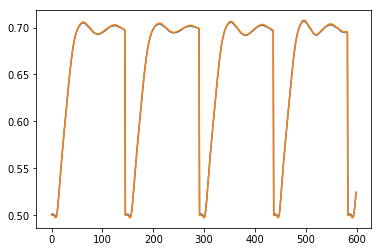

In [13]:
import matplotlib.pyplot as plt
plt.plot(res[:600])
plt.plot(Y_test[:600])
plt.show()

In [ ]:
# w = train_x2 - elm2.regressor_test(train_x1)
# W = 1 / 233599 * np.dot(w.T, w)
# print(W.shape, W)


In [ ]:
# v = train_y - elm.regressor_test(train_x1)
# V  = 1 / 233599 * np.dot(v.T, v)
# print(V.shape, v)